In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import cv2
import re

def pfm_imread(filename):
    file = open(filename, 'rb')
    color = None
    width = None
    height = None
    scale = None
    endian = None

    header = file.readline().decode('utf-8').rstrip()
    if header == 'PF':
        color = True
    elif header == 'Pf':
        color = False
    else:
        raise Exception('Not a PFM file.')

    dim_match = re.match(r'^(\d+)\s(\d+)\s$', file.readline().decode('utf-8'))
    if dim_match:
        width, height = map(int, dim_match.groups())
    else:
        raise Exception('Malformed PFM header.')

    scale = float(file.readline().rstrip())
    if scale < 0:  
        endian = '<'
        scale = -scale
    else:
        endian = '>'  

    data = np.fromfile(file, endian + 'f')
    shape = (height, width, 3) if color else (height, width)

    data = np.reshape(data, shape)
    data = np.flipud(data)
    return data, scale


[[      nan       nan       nan ... 3.287558  3.287558  3.224742 ]
 [      nan       nan       nan ... 3.29888   3.29888   3.2760658]
 [      nan       nan       nan ... 3.2842326 3.2223864 3.2223864]
 ...
 [1.6182241 1.6118987 1.6118987 ... 1.6392282 1.6392282 1.6413631]
 [1.6182241 1.6118987 1.652103  ... 1.6339538 1.6339538 1.6413631]
 [1.6126344 1.652103  1.6200664 ... 1.6374692 1.6339538 1.6340696]]


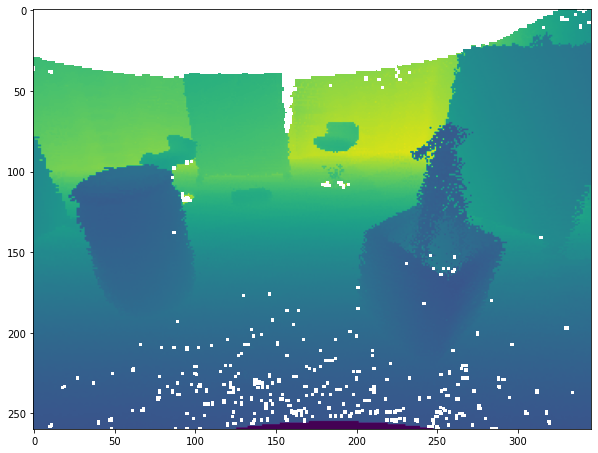

In [11]:
gt,_ = pfm_imread('/home/tlab4/cj/data_mvsec/data_train/VAL/depth/428.pfm')
# gt_path = '../depth_gt/428.jpg'
print(gt)
plt.figure(figsize=(10,10))

plt.imshow(gt)
plt.imsave('./gt.jpg',np.nan_to_num(gt))

[[2.263092  2.263092  2.3373654 ... 3.2390552 3.2109694 3.1739051]
 [2.2099104 2.2099104 2.2737265 ... 3.1976957 3.1645682 3.1225276]
 [2.1530573 2.1530573 2.2092683 ... 3.1914227 3.1596744 3.1201122]
 ...
 [1.5507207 1.5507207 1.5502965 ... 1.7428218 1.7408831 1.7389108]
 [1.5445069 1.5445069 1.5441062 ... 1.7384573 1.7365243 1.7345814]
 [1.5445069 1.5445069 1.5441062 ... 1.7384573 1.7365243 1.7345814]]


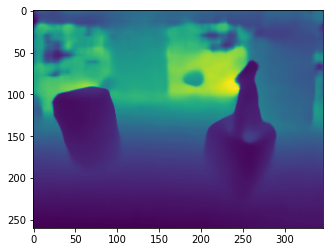

In [9]:
pred,_ = pfm_imread('/home/tlab4/cj/mobilestereonet/predictions_test/428.pfm')
# import PIL.Image as Image
# pred = Image.open('/home/tlab4/cj/mobilestereonet/predictions_test/428.pfm')
print(pred)
# plt.figure(figsize=(10,10))
plt.imshow(pred)
plt.imsave('./test.jpg', pred)

[[2.8419847 2.8419847 2.8667924 ... 2.958942  2.959884  2.9644191]
 [2.8349676 2.8349676 2.8589754 ... 2.9383948 2.939127  2.9411268]
 [2.8205671 2.8205671 2.8429728 ... 2.9064345 2.9074154 2.9090304]
 ...
 [1.6492041 1.6492041 1.6710078 ... 1.8039011 1.7775176 1.7527312]
 [1.6065152 1.6065152 1.6274849 ... 1.7659951 1.7427504 1.7181447]
 [1.6065152 1.6065152 1.6274849 ... 1.7659951 1.7427504 1.7181447]]


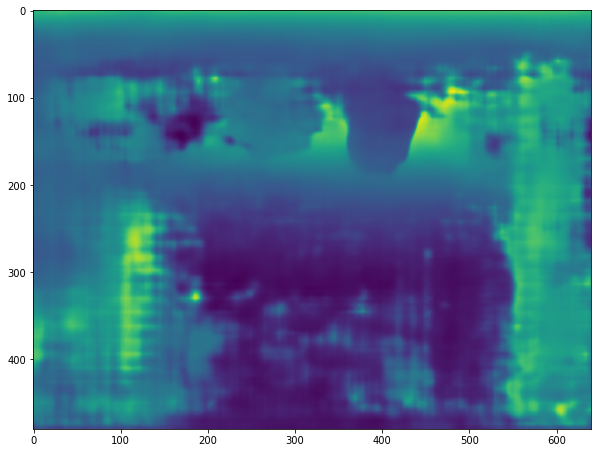

In [33]:
pred_t, _ = pfm_imread('/home/tlab4/cj/mobilestereonet/predictions_tlab/72.pfm')
print(pred_t)
plt.figure(figsize=(10,10))
plt.imshow(pred_t)
